In [1]:
import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats
import utils
import pandas_market_calendars as mcal

In [2]:
ampm = 'afternoon'
path = f'{ampm}_df_*.csv'

all_files = glob.glob(path)

li = []

for filename in tqdm(all_files):
    df = pd.read_csv(filename, index_col=None, header=0,parse_dates=['time'])
    li.append(df)
    
df = pd.concat(li, axis=0, ignore_index=True)
df = df.set_index('time')
df = df.sort_index()

100%|██████████| 5/5 [00:00<00:00, 44.82it/s]


In [3]:
df = df.drop(['gaps'],axis=1)

In [4]:
nyse = mcal.get_calendar('NYSE')
working_days = nyse.valid_days(start_date='2016-01-01', end_date='2019-12-31')

In [5]:
len(df.groupby(df.index.date))

1291

In [6]:
working_days.date

array([datetime.date(2016, 1, 4), datetime.date(2016, 1, 5),
       datetime.date(2016, 1, 6), ..., datetime.date(2019, 12, 27),
       datetime.date(2019, 12, 30), datetime.date(2019, 12, 31)],
      dtype=object)

In [7]:
ngroups  = len(df.groupby(df.index.date))
count = 0
wd_only = []
for group in df.groupby(df.index.date):
    if working_days.date[working_days.date == group[0]].any():
        wd_only.append(group[1])
        count += 1

df = pd.concat(wd_only, axis=0, ignore_index=False)
count/ngroups

0.6359411309062742

In [8]:
df_new = df.set_index(df.index.strftime('%T'))
daily_anom = []
median_daily_speed = df_new.groupby(df_new.index).median()

for group in df_new.groupby(df.index.date):
    
    group[1]['speed'] = group[1]['speed'] - median_daily_speed['speed'].values
    daily_anom.append(group[1])
    
df_anom = pd.concat(daily_anom, axis=0, ignore_index=False)

<ipython-input-8-99b6eeca1608>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group[1]['speed'] = group[1]['speed'] - median_daily_speed['speed'].values


In [9]:
len(df)

27093

In [10]:
len(df_anom)

27093

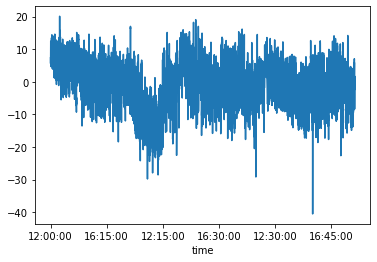

In [11]:
df_anom['speed'].plot()

In [12]:
df_anom_time = df_anom.set_index(df.index)
df['speed_anom'] = df_anom_time['speed']

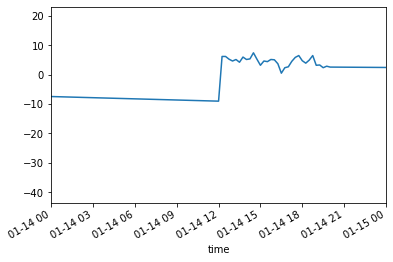

In [13]:
df_anom_time['speed'].plot(xlim=('2019-01-14','2019-01-15'))

In [14]:
df_norm = df.copy()

In [15]:
df_norm.std().to_csv(f'std_{ampm}.csv')
df_norm.mean().to_csv(f'mean_{ampm}.csv')

In [16]:
df_norm = (df_norm-df_norm.mean())/df_norm.std()

In [17]:
df_norm['frz_prec'] = df['frz_prec']**(1/3)
df_norm['frz_prec'] = (df_norm['frz_prec'] - df_norm['frz_prec'].min())/(df_norm['frz_prec'].max()-df_norm['frz_prec'].min())

In [18]:
df_norm['frz_prec_pred'] = df['frz_prec_pred']**(1/3)
df_norm['frz_prec_pred'] = (df_norm['frz_prec_pred'] - df_norm['frz_prec_pred'].min())/(df_norm['frz_prec_pred'].max()-df_norm['frz_prec_pred'].min())

In [19]:
df_norm['liq_prec'] = df['liq_prec']**(1/3)
df_norm['liq_prec'] = (df_norm['liq_prec'] - df_norm['liq_prec'].min())/(df_norm['liq_prec'].max()-df_norm['liq_prec'].min())

In [20]:
df_norm['liq_prec_pred'] = df['liq_prec_pred']**(1/3)
df_norm['liq_prec_pred'] = (df_norm['liq_prec_pred'] - df_norm['liq_prec_pred'].min())/(df_norm['liq_prec_pred'].max()-df_norm['liq_prec_pred'].min())

In [21]:
df_norm = df_norm.bfill()
df_norm = df_norm.interpolate('linear')

df_norm.to_csv(f'merged_df_{ampm}.csv')

In [22]:
df['speed'].std()

7.962393323340618

In [23]:
df

,tmpf,frz_prec,liq_prec,frz_prec_pred,liq_prec_pred,speed,hour,speed_diff,speed_anom
time,,,,,,,,,
2016-01-04 12:00:00,30.02,0.0,0.0,0.0,0.0,49.606667,1.224647e-16,0.826667,7.353333
2016-01-04 12:15:00,30.02,0.0,0.0,0.0,0.0,48.466667,-6.540313e-02,-1.140000,5.803333
2016-01-04 12:30:00,28.94,0.0,0.0,0.0,0.0,49.503333,-1.305262e-01,1.036667,6.840000
2016-01-04 12:45:00,28.94,0.0,0.0,0.0,0.0,48.880000,-1.950903e-01,-0.623333,6.113333
2016-01-04 13:00:00,28.94,0.0,0.0,0.0,0.0,48.470000,-2.588190e-01,-0.410000,5.600000
...,...,...,...,...,...,...,...,...,...
2019-12-27 19:00:00,54.00,0.0,0.0,0.0,0.0,36.241667,-9.659258e-01,3.625000,-1.661667
2019-12-27 19:15:00,54.00,0.0,0.0,0.0,0.0,39.141667,-9.469301e-01,2.900000,-0.626667
2019-12-27 19:30:00,54.00,0.0,0.0,0.0,0.0,40.901667,-9.238795e-01,1.760000,-0.726667


In [24]:
cond_cold = (df['tmpf']<32)
cond_icy = (df['frz_prec']>0)

<ipython-input-25-b9d2bf490451>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cold['speed'] = cold['speed']*df['speed'].std()+df['speed'].mean()
<ipython-input-25-b9d2bf490451>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icy['speed'] = icy['speed']*df['speed'].std()+df['speed'].mean()


Text(0.5, 1.0, 'afternoon')

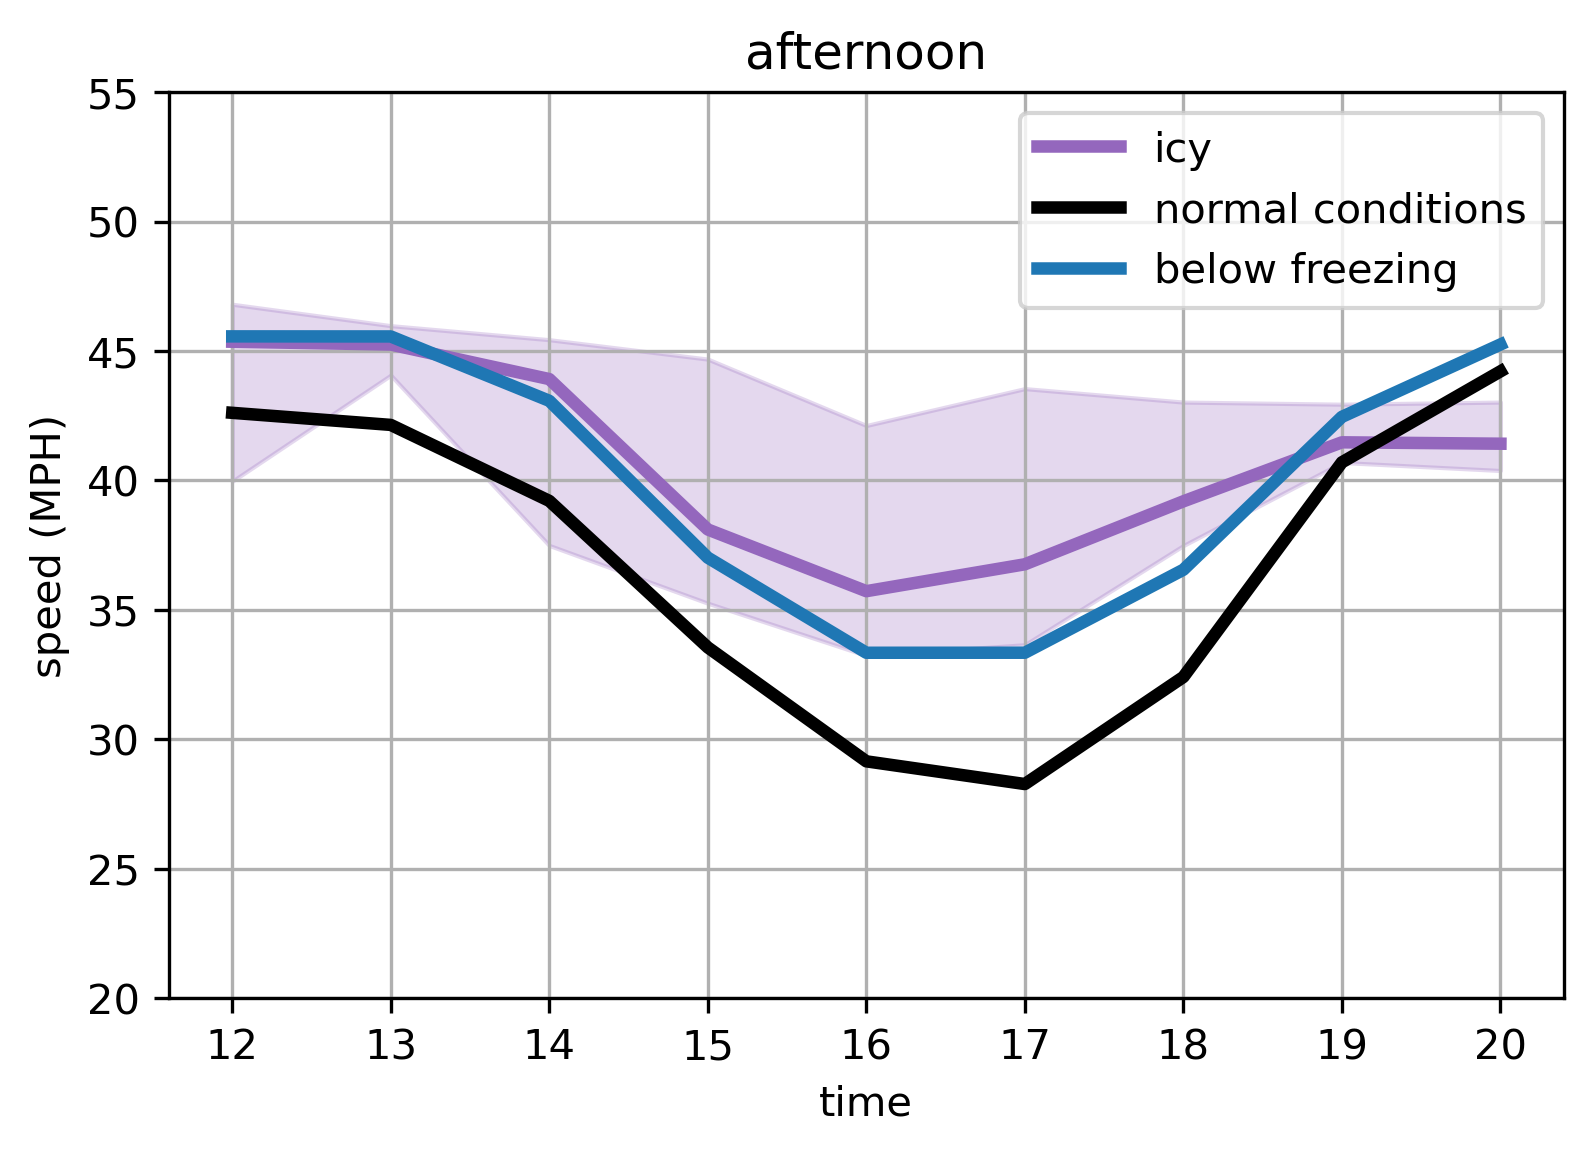

In [25]:
plt.figure(dpi=300)

cold =df_norm[cond_cold]
icy = df_norm[cond_icy]
normal = df_norm['speed'].groupby(df_norm['speed'].index.hour).median()*df['speed'].std()+df['speed'].mean()

cold['speed'] = cold['speed']*df['speed'].std()+df['speed'].mean()
icy['speed'] = icy['speed']*df['speed'].std()+df['speed'].mean()


uq = icy.groupby(icy.index.hour)['speed'].quantile(.75)
lq = icy.groupby(icy.index.hour)['speed'].quantile(.25)
median = icy.groupby(icy.index.hour).median()['speed']

median.plot(lw=3,label='icy',c='tab:purple')
plt.fill_between(uq.index,uq,lq,alpha=0.25,color='tab:purple')

normal.plot(label='normal conditions',lw=3,c='k')
cold.groupby(cold.index.hour).median()['speed'].plot(label='below freezing',lw=3)

plt.grid()
plt.ylabel('speed (MPH)')
plt.legend()
plt.ylim(20,55)
plt.title(ampm)

In [26]:
cond_heavy = (df['liq_prec'] > 0.125)
cond_rainy = (df['liq_prec'] > 0)

<ipython-input-27-54d4fc6f477a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainy['speed'] = rainy['speed']*df['speed'].std()+df['speed'].mean()
<ipython-input-27-54d4fc6f477a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hrain['speed'] = hrain['speed']*df['speed'].std()+df['speed'].mean()


Text(0.5, 1.0, 'afternoon')

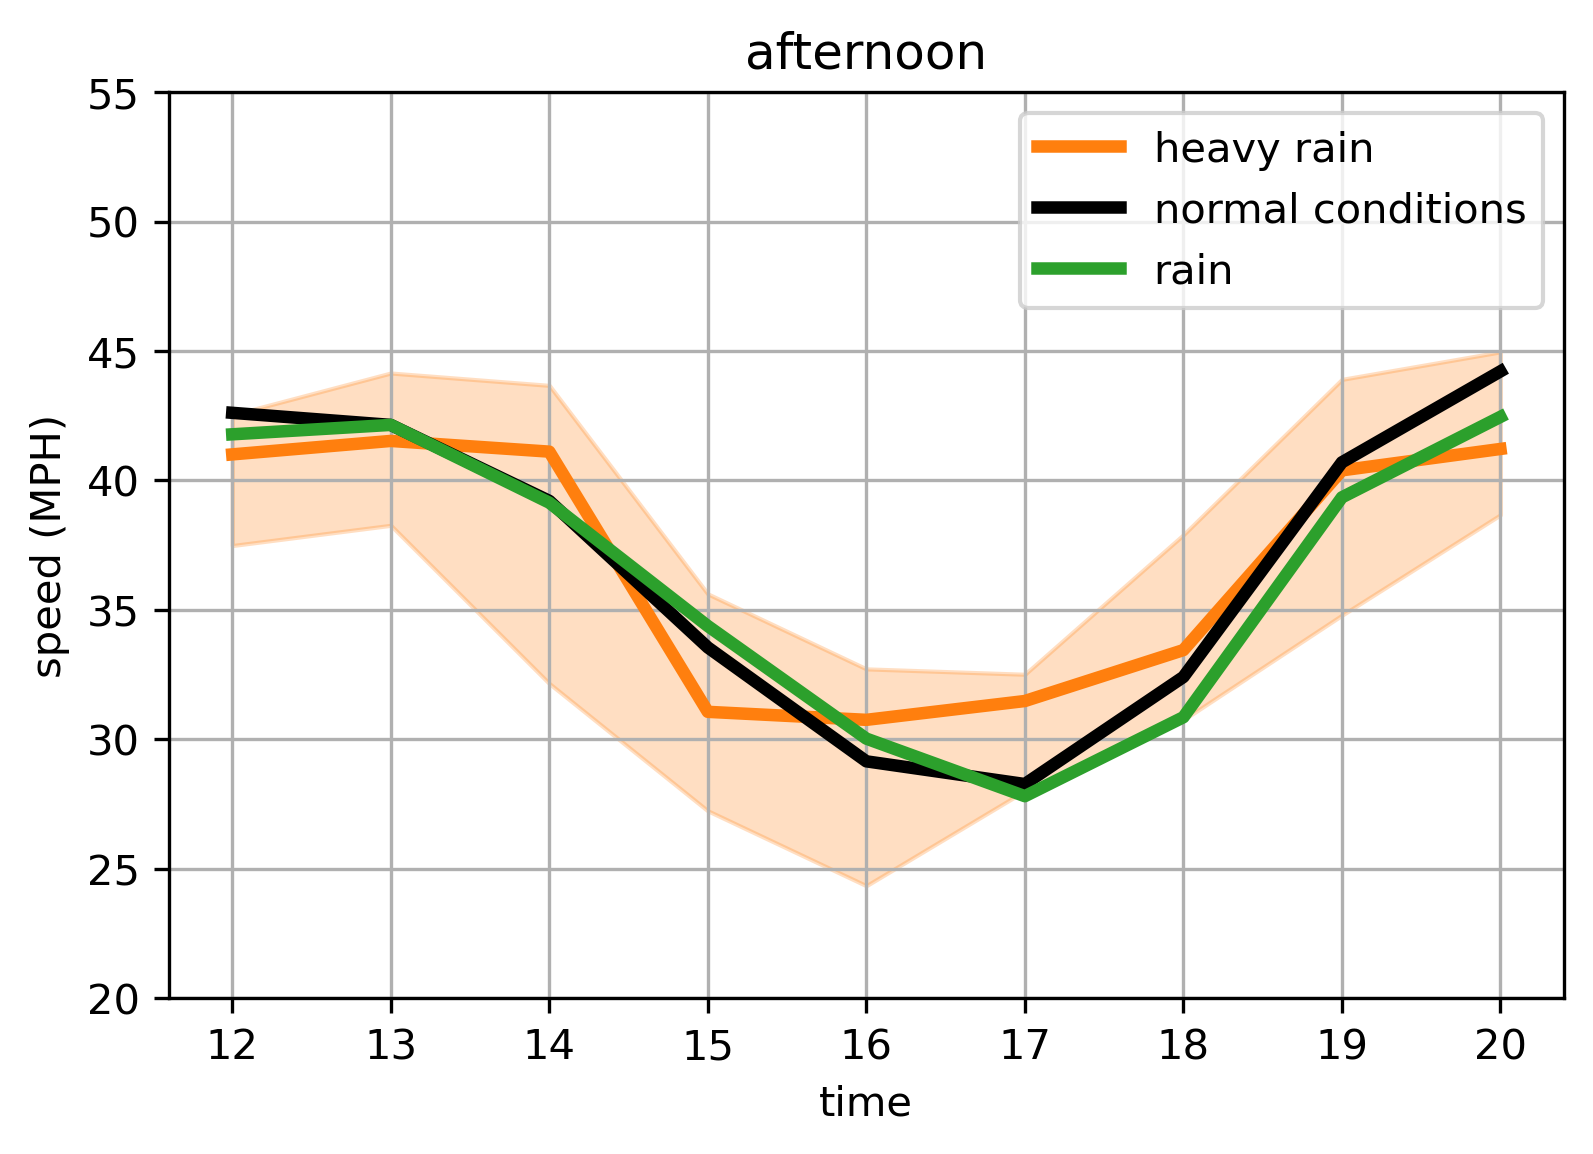

In [27]:
plt.figure(dpi=300)

rainy = df_norm[cond_rainy]
hrain = df_norm[cond_heavy]
normal = df_norm['speed'].groupby(df_norm['speed'].index.hour).median()*df['speed'].std()+df['speed'].mean()

rainy['speed'] = rainy['speed']*df['speed'].std()+df['speed'].mean()
hrain['speed'] = hrain['speed']*df['speed'].std()+df['speed'].mean()


uq = hrain.groupby(hrain.index.hour)['speed'].quantile(.75)
lq = hrain.groupby(hrain.index.hour)['speed'].quantile(.25)
median = hrain.groupby(hrain.index.hour).median()['speed']

median.plot(lw=3,label='heavy rain',c='tab:orange')
plt.fill_between(uq.index,uq,lq,alpha=0.25,color='tab:orange')

normal.plot(label='normal conditions',lw=3,c='k')
rainy.groupby(rainy.index.hour).median()['speed'].plot(label='rain',lw=3,c='tab:green')

plt.grid()
plt.ylabel('speed (MPH)')
plt.legend()
plt.ylim(20,55)
plt.title(ampm)